## Praca domowa nr 4: Medical Expenditure Panel Survey

### Anna Kozioł 

Cel: Na postawie danych progozować wydatki na leczenie oraz wyjaśnić zmianę wyestymowanej wartości dla zmiany wartości różnych zmiennych metodą Ceterus Paribus. <br>
Wykresy w raporcie wczytane są jako png, ponieważ jedyną opcją ich wyświetlenia było otwarcie nowego okna, funkcje plot_notebook wyswietlały puste pola. 

## Wybór dwóch obserwacji do analizy wyjaśnialności

Do wyjaśnialności wybrałam dwie obserwacje, pacjenta który wygenerował najwyższy wydatek oraz odpowiednio- najniższy. <br>
Krzywe Ceteris Paribus zosatły narysowane dla dwóch zmiennych ciągłych- wieku oraz dochodu pacjenta.

In [37]:
obserwacja1 # 659 952

,REGION,AGE31X,GENDER,RACE3,MARRY31X,EDRECODE,FTSTU31X,ACTDTY31,HONRDC31,RTHLTH31,...,DFSEE42,ADSMOK42,PCS42,MCS42,K6SUM42,PHQ242,EMPST31,POVCAT15,INSCOV15,INCOME_M
13422,2,39,1.0,0.0,4,15,-1,2,2,4,...,2,1,44.89,12.22,19,6,1,5,1,88056.0


In [9]:
obserwacja2 # 1 dolar

,REGION,AGE31X,GENDER,RACE3,MARRY31X,EDRECODE,FTSTU31X,ACTDTY31,HONRDC31,RTHLTH31,...,DFSEE42,ADSMOK42,PCS42,MCS42,K6SUM42,PHQ242,EMPST31,POVCAT15,INSCOV15,INCOME_M
31925,3,42,1.0,1.0,1,13,-1,2,2,4,...,1,2,45.04,37.38,19,5,4,1,2,8808.0


# (1) Model Lasu losowego

Mean Absolute Error: 6216.988924524844
Mean Squared Error: 185847926.7413718
Root Mean Squared Error: 13632.605280773438
R^2: 0.0721985764576405
R^2 na treningowym: 0.8504979925958613


## Wyjasnienie

### 1) przykład: 1 obserwacja i zmienna Income

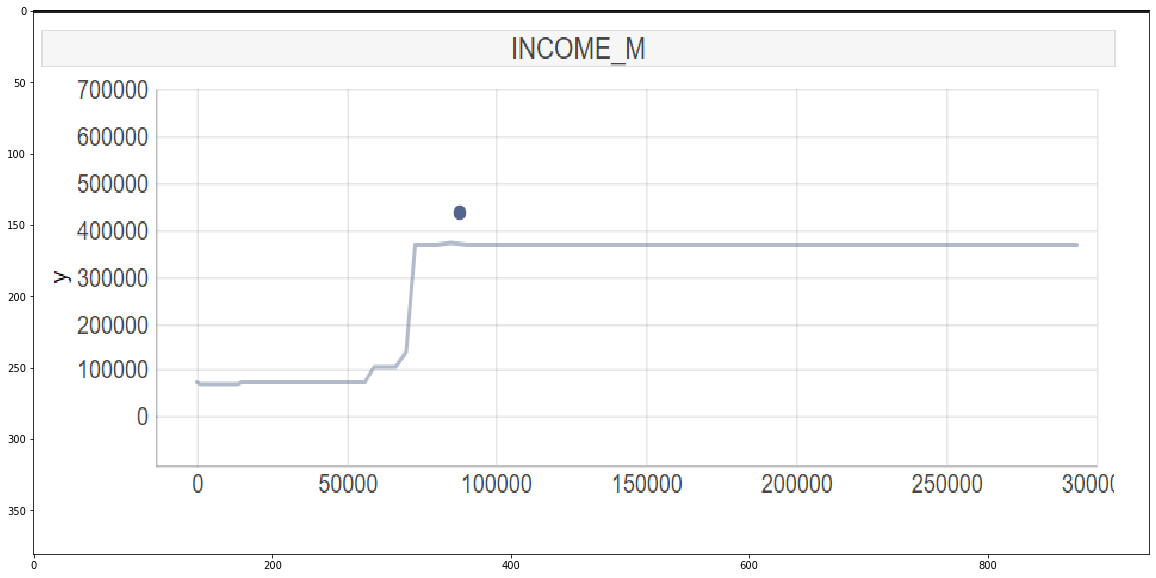

In [38]:

plt.figure(figsize = (20,10))
image = mpimg.imread("rf_1obs_income.png")
plt.imshow(image,aspect='auto')
plt.show()

Wykres przedstawia krzywą Ceteris Paribus dla obserwacji która wygenerowała najwyższy koszt. Wykres opisuje na osi x zmienną **INCOME_M** mówiącą o dochodach pacjenta. Widzimy że do pewnego momentu tj do zarobków ok 50 tys miesięcznie koszt wydatków na leczenie jest stosunkowo niski zatem gdyby ten pacjent zarabiał mniej (przy zachowaniu stałych innych cech), wygenerowałby znacznie niższy koszt, następnie następuje drastyczny wzrost, w przedziale 50 tys- 70tys koszty leczenia wzrastają z prawie 100 tys na ok 380 tys. Przy zarobkach powyżej 70 tys sytuacja stabilizuje się i koszty wydatków na leczenie wynoszą ok 380 tys.
Predykcja dla naszej obserwacji wynosiła ponad 400 tysięcy podczas gdy prawdziwa wartość wahała się w przedziale 600-700 tysięcy dolarów.

### 2) przykład : 1 obserwacja i zmienna Age

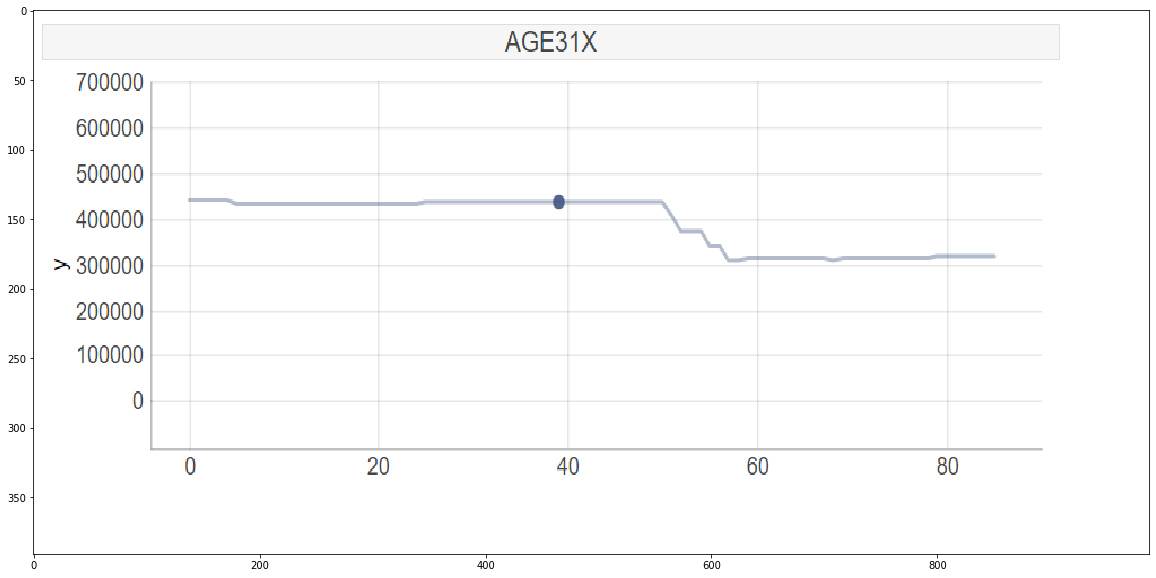

In [37]:
plt.figure(figsize = (20,10))
image = mpimg.imread("rf_1obs_age.png")
plt.imshow(image,aspect='auto')
plt.show()

Ten wykres również przedstawia krzywą Ceteris Paribus dla obserwacji która wygenerowała najwyższy koszt, pacjent miał 39 lat. Wykres opisuje na osi x zmienną **AGE31X** mówiącą o wieku pacjenta. Widzimy że w tej sytuacji koszty pacjenta wynosiłyby tyle samo, dopiero przekroczenie 50 roku życia powodowało by spadek kosztów leczenia, (przy zachowaniu stałych innych cech) co nie do końca wydaje się zgodne z intuicją gdyż starsi pacjenci zazwyczaj wymagają więcej opieki. Możliwe że wpływ na taki wynik miały inne zmienne, lub to że rozważamy zmianę wieku z 39 na 50 lat, ale utzrymujemy stałe inne cechy, które w tym czasie mogłyby też ulec zmianie.

### 3) przykład: 2 obserwacja i zmienna Income

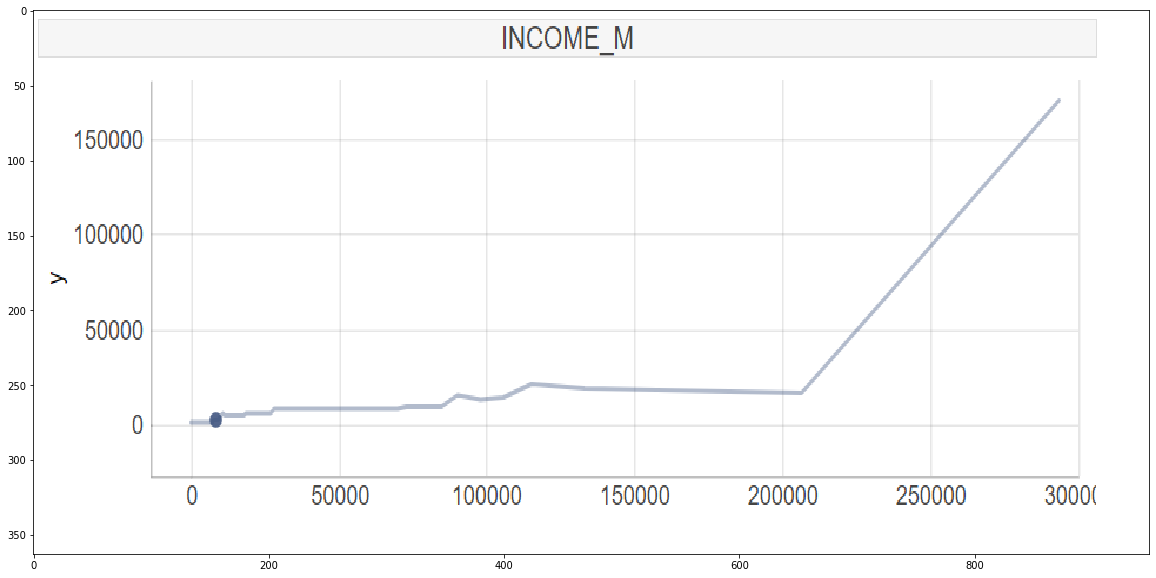

In [53]:
plt.figure(figsize = (20,10))
image = mpimg.imread("rf_2obs_income.png")
plt.imshow(image,aspect='auto')
plt.show()

Wykres przedstawia krzywą Ceteris Paribus dla obserwacji która wygenerowała najniższy koszt. 
Predykcja dla naszej obserwacji wynosiła ok 4 tysięcy podczas gdy prawdziwa wartość wynosiła tylko jeden dolar. Model zatem mocno przeszacował.
Wykres opisuje na osi x zmienną **INCOME_M** mówiącą o dochodach pacjenta. Widzimy że do pewnego momentu tj do zarobków ok 200 tys miesięcznie koszt wydatków na leczenie jest stały, póżniej wzrasta zatem dopiero gdyby ten pacjent zarabiał znacznie więcej (ok 150 razy więcej, przy zachowaniu stałych innych cech), wygenerowałby znacznie wyższy koszt.


# (2) Model Gradient Boosting

Mean Absolute Error: 5610.88422222472
Mean Squared Error: 169613248.0492344
Root Mean Squared Error: 13023.565105194291
R^2: 0.153246335587497
R^2 na treningowym: 0.8504979925958613


## Wyjasnienie

### 1) przykład: 1 obserwacja i zmienna Income

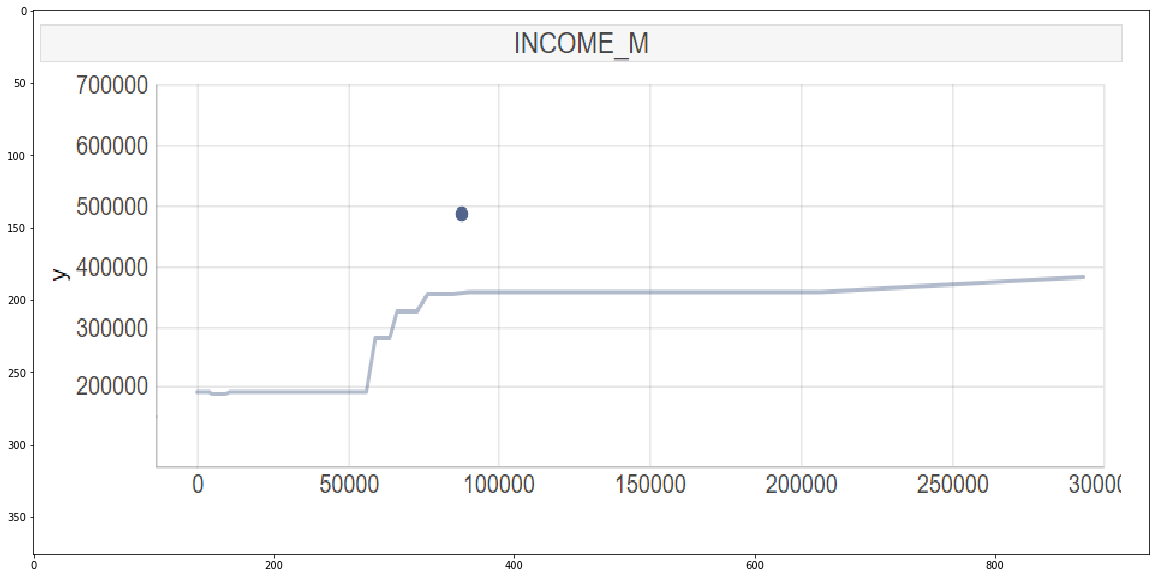

In [44]:
plt.figure(figsize = (20,10))
image = mpimg.imread("gbr_1obs_income.png")
plt.imshow(image,aspect='auto')
plt.show()

Wykres przedstawia krzywą Ceteris Paribus dla obserwacji która wygenerowała najwyższy koszt.
Predykcja dla naszej obserwacji wynosiła ok 500 tysięcy podczas gdy prawdziwa wartość wahała się w przedziale 600-700 tysięcy dolarów.
Wykres opisuje na osi x zmienną **INCOME_M** mówiącą o dochodach pacjenta. Widzimy że do pewnego momentu tj do zarobków  50 tys miesięcznie koszt wydatków na leczenie jest stosunkowo niski zatem gdyby ten pacjent zarabiał mniej (przy zachowaniu stałych innych cech), wygenerowałby znacznie koszt, następnie następuje wzrost, w przedziale 60 tys- 70tys zarobków koszty leczenia wzrastają z  200 tys na ok 380 tys. Przy zarobkach powyżej 70 tys sytuacja stabilizuje się i koszty wydatków na leczenie wynoszą ok 380 tys.
Ten model dostarcza analogicznych wniosków jak rf dla tej obserwacji.

### 2) przykład : 1 obserwacja i zmienna Age

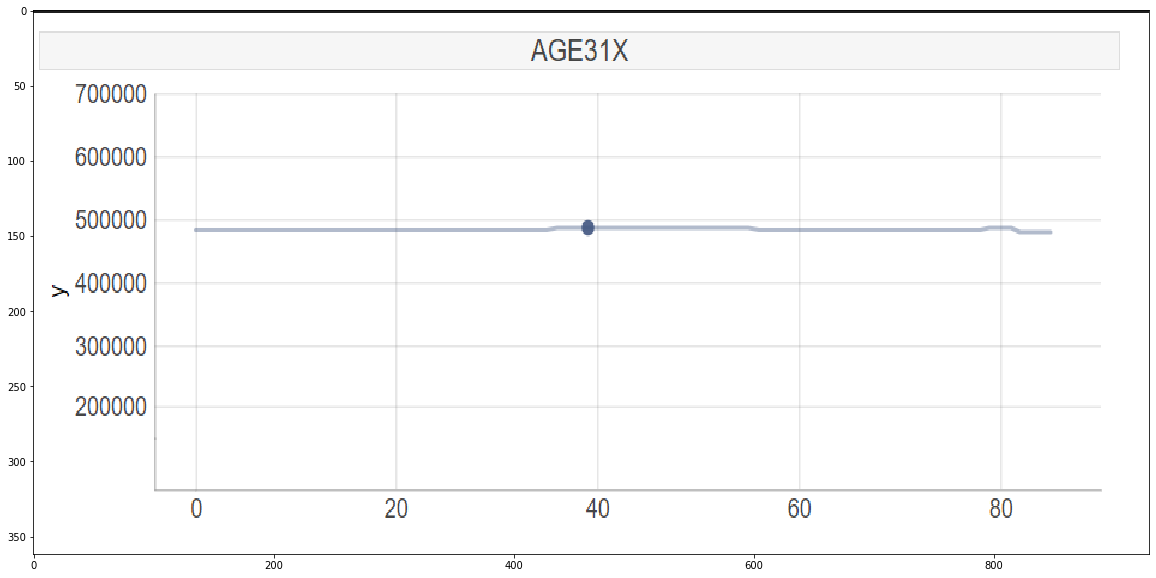

In [49]:
plt.figure(figsize = (20,10))
image = mpimg.imread("gbr_1obs_age.png")
plt.imshow(image,aspect='auto')
plt.show()

Ten wykres również przedstawia krzywą Ceteris Paribus dla obserwacji która wygenerowała najwyższy koszt, pacjent miał 39 lat. Wykres opisuje na osi x zmienną **AGE31X** mówiącą o wieku pacjenta. Widzimy że w tej sytuacji koszty pacjenta wynosiłyby tyle samo, niezależnie od wieku jaki by posiadał. 
Tutaj wniosek nieco różni się od poprzedniego modelu, tam koszt spadał gdyby pacjent przekroczył 50 lat przy zachowaniu stałych innych cech. Jednak ten spadek nie był drastycznie duży. Można powiedzieć że wnioski z obu modeli są podobne.

### 3) przykład: 2 obserwacja i zmienna Income

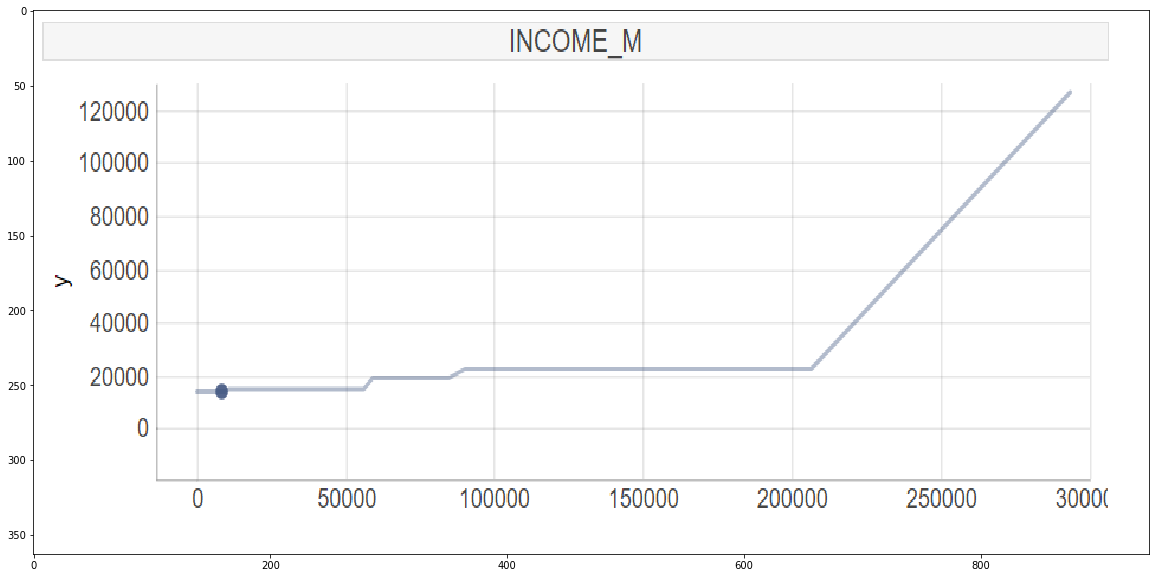

In [57]:
plt.figure(figsize = (20,10))
image = mpimg.imread("gbr_2obs_income.png")
plt.imshow(image,aspect='auto')
plt.show()

Dla tej obserwacji oraz tego modelu wykres zatem i wnioski przebiegają analogicznie jak w modelu lasu losowego dla tego przypadku.

## Kody do raportu

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from ceteris_paribus.explainer import explain
from ceteris_paribus.plots.plots import plot_notebook, plot
from ceteris_paribus.profiles import individual_variable_profile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [ ]:
dane = pd.read_csv("h181_preprocessing.csv", sep = ',', index_col=0)
dane.drop(columns = ['PERSONWT', "PANEL"], inplace=True)
dane = dane[(dane.HEALTHEXP > 0)]
obserwacja1 = dane[dane.HEALTHEXP == max(dane.HEALTHEXP)]
obserwacja2 = dane[dane.HEALTHEXP == min(dane.HEALTHEXP)]
obs1_true = obserwacja1.HEALTHEXP
obs2_true = obserwacja2.HEALTHEXP
obserwacja2.pop('HEALTHEXP')
obserwacja1.pop('HEALTHEXP')

In [ ]:
dane = pd.read_csv("h181_preprocessing.csv", sep = ',', index_col=0)

In [ ]:
for a in dane.columns:
    print(a, dane[a].unique()) 
    colCateg = ['REGION','MARRY31X','EDRECODE','FTSTU31X','ACTDTY31','HONRDC31',
            'RTHLTH31','MNHLTH31','HIBPDX','CHDDX','ANGIDX','MIDX','OHRTDX','STRKDX',
            'EMPHDX','CHBRON31','CHOLDX','CANCERDX','DIABDX','JTPAIN31','ARTHDX',
            'ARTHTYPE','ASTHDX','ADHDADDX','PREGNT31','WLKLIM31','ACTLIM31','SOCLIM31',
            'COGLIM31','DFHEAR42','DFSEE42','ADSMOK42','PHQ242','EMPST31','POVCAT15','INSCOV15']
for cat in colCateg:
    dane[cat] = dane[cat].astype('category')
dane.drop(columns = ['PERSONWT', "PANEL"], inplace=True) # nie bedą predykcyjne

In [ ]:
dane = pd.read_csv("h181_preprocessing.csv", sep = ',', index_col=0)
dane.drop(columns = ['PERSONWT', "PANEL", ], inplace=True)
dane = dane[(dane.HEALTHEXP > 0)]
y = dane.pop('HEALTHEXP')
from sklearn.model_selection import train_test_split
dfTrain, dfTest, yTrain, yTest = train_test_split(dane, y, random_state=0)

In [ ]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
rf = regressor.fit(dfTrain, yTrain)
y_pred = regressor.predict(dfTest)
print('Mean Absolute Error:', metrics.mean_absolute_error(yTest, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(yTest, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yTest, y_pred)))
print('R^2:', metrics.r2_score(yTest,y_pred ))
y_pred2 = regressor.predict(dfTrain)
print('R^2 na treningowym:', metrics.r2_score(yTrain,y_pred2 ))

In [ ]:
explainer = explain(rf, dfTrain.columns.values.tolist(), dfTrain, yTrain, rf.predict)

cp = individual_variable_profile(explainer, dfTrain.loc[13422,:], yTrain.loc[13422])
plot(cp, selected_variables=["INCOME_M"], inline=True)

explainer = explain(rf, dfTrain.columns.values.tolist(), dfTrain, yTrain, rf.predict)

cp = individual_variable_profile(explainer, dfTrain.loc[13422,:], yTrain.loc[13422])
plot(cp, selected_variables=["AGE31X"], inline=True)


explainer = explain(rf, dfTrain.columns.values.tolist(), dfTrain, yTrain, rf.predict)

cp = individual_variable_profile(explainer, dfTrain.loc[31925,:], yTrain.loc[31925])
plot(cp, selected_variables=["INCOME_M"], inline=True)



In [ ]:
gbr = GradientBoostingRegressor(n_estimators=600, 
    max_depth=5, 
    learning_rate=0.01, 
    min_samples_split=3)
# with default parameters
gbr = GradientBoostingRegressor()
gbr.fit(dfTrain, yTrain)
y_pred = gbr.predict(dfTest)
print('Mean Absolute Error:', metrics.mean_absolute_error(yTest, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(yTest, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yTest, y_pred)))
print('R^2:', metrics.r2_score(yTest,y_pred ))
y_pred2 = regressor.predict(dfTrain)
print('R^2 na treningowym:', metrics.r2_score(yTrain,y_pred2 ))

In [ ]:
explainer = explain(gbr, dfTrain.columns.values.tolist(), dfTrain, yTrain, gbr.predict)

cp = individual_variable_profile(explainer, dfTrain.loc[13422,:], yTrain.loc[13422])
plot(cp, selected_variables=["INCOME_M"], inline=True)


explainer = explain(gbr, dfTrain.columns.values.tolist(), dfTrain, yTrain, gbr.predict)

cp = individual_variable_profile(explainer, dfTrain.loc[13422,:], yTrain.loc[13422])
plot(cp, selected_variables=["AGE31X"], inline=True)


explainer = explain(gbr, dfTrain.columns.values.tolist(), dfTrain, yTrain)

cp = individual_variable_profile(explainer, dfTrain.loc[31925,:], yTrain.loc[31925])
plot(cp, selected_variables=["INCOME_M"], inline=True)